In [3]:
import pandas as pd

df_partidas = pd.read_csv('../datos/earthquake_data.csv')
df_partidas

df_partidas.dropna(inplace=True)
df_partidas

,time,magnitude,place,depth_km,longitude,latitude,type,status,region,severity,depth_category,time_of_day,continent,energy_joules,coast_distance_km
0,2025-05-21 23:58:17.520,3.15,"88 km NW of San Antonio, Puerto Rico",19.820,-67.678167,19.069833,earthquake,reviewed,Puerto Rico,moderado,superficial,noche,Ocean,3.349654e+09,252.003431
1,2025-05-21 22:47:21.880,3.66,"93 km NE of Punta Cana, Dominican Republic",8.000,-67.727600,19.130800,earthquake,reviewed,Dominican Republic,moderado,superficial,noche,Ocean,1.949845e+10,140.498974
2,2025-05-21 22:33:54.343,4.40,"57 km NW of Abra Pampa, Argentina",267.124,-66.156400,-22.430400,earthquake,reviewed,Argentina,moderado,profundo,noche,South America,2.511886e+11,2720.475380
3,2025-05-21 21:42:48.540,3.30,"86 km NNW of San Antonio, Puerto Rico",48.820,-67.512500,19.167667,earthquake,reviewed,Puerto Rico,moderado,intermedio,noche,Ocean,5.623413e+09,512.187987
4,2025-05-21 21:06:05.080,3.55,"98 km N of Charlotte Amalie, U.S. Virgin Islands",37.000,-64.829500,19.230300,earthquake,reviewed,U.S. Virgin Islands,moderado,intermedio,noche,Ocean,1.333521e+10,403.876619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-05-01 00:11:20.797,4.80,"54 km WNW of San Antonio de los Cobres, Argentina",201.061,-66.777700,-23.972500,earthquake,reviewed,Argentina,moderado,profundo,noche,South America,1.000000e+12,2067.310135
996,2025-04-30 23:56:05.370,4.90,"288 km N of Tobelo, Indonesia",17.647,128.207900,4.332700,earthquake,reviewed,Indonesia,moderado,superficial,noche,Ocean,1.412538e+12,195.910157
997,2025-04-30 23:49:18.800,2.90,"73 km E of Port Alsworth, Alaska",123.600,-153.005900,60.142600,earthquake,reviewed,Alaska,leve,profundo,noche,Ocean,1.412538e+09,1269.448021
998,2025-04-30 23:48:11.495,4.10,"17 km SE of Bodrum, Turkey",18.669,27.557700,36.917600,earthquake,reviewed,Turkey,moderado,superficial,noche,Africa,8.912509e+10,253.885111


In [12]:
# model_training.py
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Cargar datos
df = pd.read_csv("../datos/earthquake_data.csv")

# Preprocesamiento
le = LabelEncoder()
df['continent_encoded'] = le.fit_transform(df['continent'])
df['time_of_day_encoded'] = le.fit_transform(df['time_of_day'])

# Features y target
X = df[['magnitude', 'depth_km', 'coast_distance_km', 'continent_encoded', 'time_of_day_encoded']]
y = df['severity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nImportancia de features:\n", importances.sort_values(ascending=False))

              precision    recall  f1-score   support

      fuerte       0.94      0.89      0.92        19
       grave       0.00      0.00      0.00         1
        leve       1.00      1.00      1.00        75
    moderado       0.99      1.00      1.00       205

    accuracy                           0.99       300
   macro avg       0.73      0.72      0.73       300
weighted avg       0.99      0.99      0.99       300


Importancia de features:
 magnitude              0.874660
depth_km               0.066456
coast_distance_km      0.034159
continent_encoded      0.022869
time_of_day_encoded    0.001856
dtype: float64


c:\Users\USUARIO\Desktop\Ingeneria de datos\taller-3-ing-datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USUARIO\Desktop\Ingeneria de datos\taller-3-ing-datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USUARIO\Desktop\Ingeneria de datos\taller-3-ing-datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

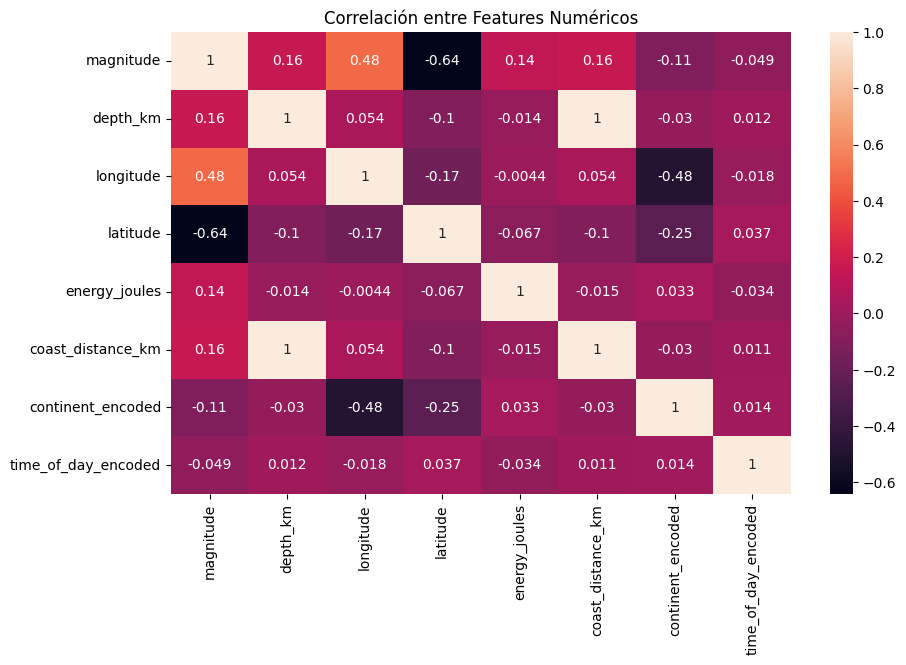

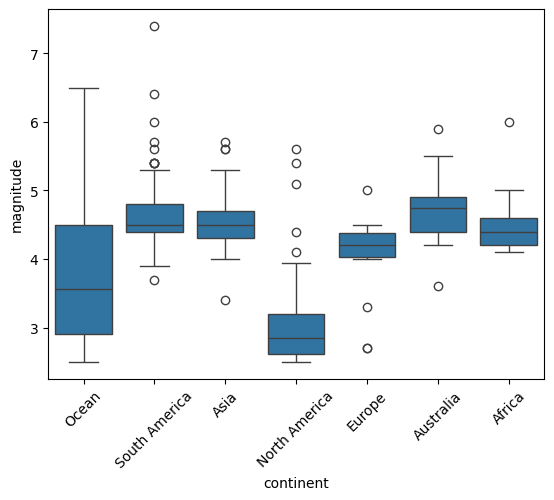

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Correlación entre Features Numéricos")
plt.show()

# Distribución de magnitudes por continente
sns.boxplot(x='continent', y='magnitude', data=df)
plt.xticks(rotation=45)
plt.show()